In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [2]:
med_data = pd.read_csv("insurance.csv")

In [3]:
med_data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
med_data.shape

(1338, 7)

In [5]:
med_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
med_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
# encoding sex column
med_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
med_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
med_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_924\1582394886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  med_data.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_924\1582394886.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  med_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_924\1582394886.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expl

In [8]:
print(med_data['region'])

0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int64


In [9]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [10]:
#data splitting
x = med_data.drop(columns='charges',axis=1)
y = med_data['charges']

In [11]:
#splitting the data into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [12]:
#model training
linreg = LinearRegression()

In [13]:
linreg.fit(x_train,y_train)

LinearRegression()

In [14]:
#model evaluation

train_data_pre = linreg.predict(x_train)
error_score = metrics.r2_score(y_train,train_data_pre)
print(error_score)

0.7413131194887537


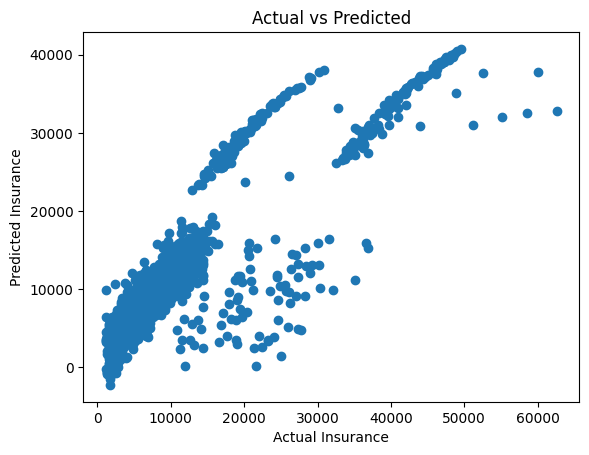

In [15]:
#visualize the actual price
plt.scatter(y_train,train_data_pre)
plt.xlabel("Actual Insurance")
plt.ylabel("Predicted Insurance")
plt.title("Actual vs Predicted")
plt.show()

In [16]:
#building a predictive system

In [24]:
input_data = [19,0,24.6,1,1,1]
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1,-1)
prediction = linreg.predict(input_data_reshaped)
print(prediction)

[1126.77414724]


C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
